Imagine that Chevrolet has hired me as their data scientist. Chevrolet is planning to introduce another electric vehicle in the same price range as Tesla model 3. Chevrolet marketing executives want to figure out which regions to focus on for their marketing campaign to sell their new model. They just received sales data from state of Washington and want to make decisions based on the data.

As a data scientist, I will analyze the data to see regions where Chevrolet's are selling well and regions where there main competitors like Tesla are selling well. 

Here are the different analysis findings I will discuss:
<br>
<b>Market share</b>
<br>
1.Sales of Electric Vehicles in WA in Q2 2023
<br>
2.Total Cars sold by type
<br>
3.Market share charts
<br>
4.Total Cars sold by Model
<br>
<b>Zipcode analysis and findings</b>
<br>
5.Correlation Heatmap 
<br>
6.Tesla vs Chevy by zipcode
<br>
7.Top 10 zipcodes for Chevy and Tesla 
<br>
<b>Summary/strategy</b>




In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [186]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
df=df[df['State']=='WA']

In [4]:
len(df['Vehicle Location'])

150141

In [5]:
t=np.unique(df['Electric Vehicle Type'],return_counts=True)

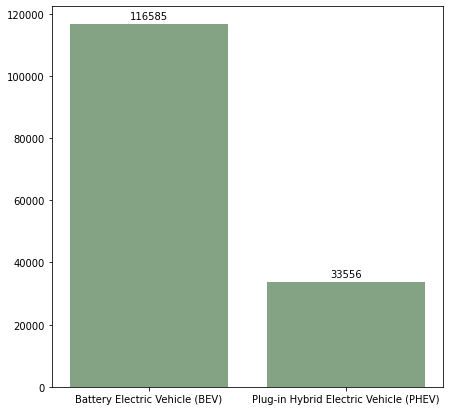

In [6]:
color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.6 # transparency
         ) 
# plt.figure(figsize=(15,15))
fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(1,1,1)
bars=ax.bar(t[0],t[1],color=color)
for bar in bars:
    height=bar.get_height()
    ax.annotate(f'{height}',xy=(bar.get_x()+bar.get_width()/2,height),xytext=(0,3),
    textcoords="offset points", ha='center', va='bottom')

In [ ]:
h=pd.DataFrame(np.unique(df['Make'],return_counts=True)).T.rename(columns={0:'Make',1:'count'})
h

In [8]:
h['Make'].iloc[h[h['count']<900].index]=''

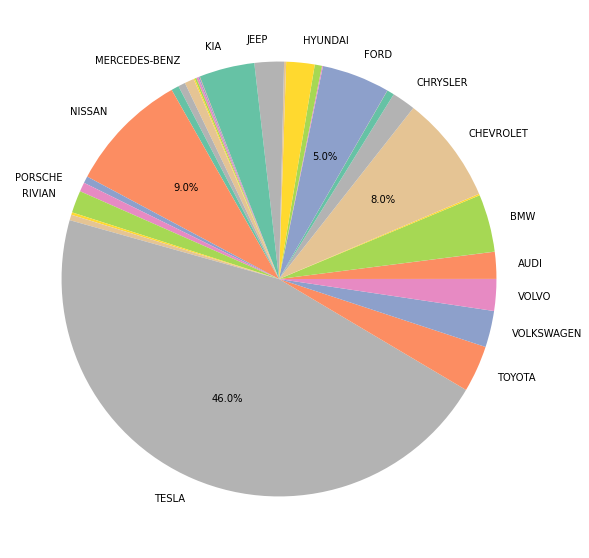

In [9]:
plt.figure(figsize=(10,10))
plt.pie(h['count'], labels=h['Make'], colors=sns.color_palette("Set2"), autopct=lambda p: '{:.1f}%'.format(round(p)) if p >= 5 else '');

In [ ]:
m=pd.DataFrame(np.unique(df[df['Electric Vehicle Type']=='Battery Electric Vehicle (BEV)']['Make'],return_counts=True)).T.rename(columns={0:'Make',1:'count'})
m

In [ ]:
# m['Make'].iloc[m[m['count']<500].index]=''

In [11]:
m['Make'].iloc[m[m['Make'].isin(['MINI','PORSCHE','SMART','MERCEDES-BENZ','LEXUS','LUCID','TH!NK'])].index]=''

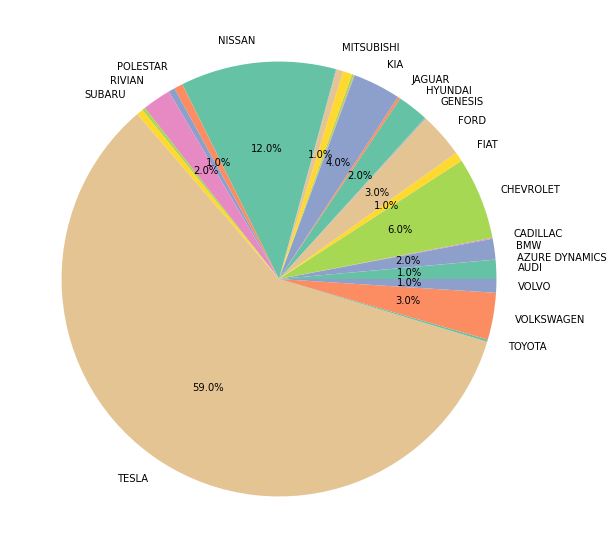

In [12]:
plt.figure(figsize=(10,10))
plt.pie(m['count'], labels=m['Make'], colors=sns.color_palette("Set2"), autopct=lambda p: '{:.1f}%'.format(round(p)) if p >= 0.5 else '');

In [ ]:
m=pd.DataFrame(np.unique(df[df['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']['Make'],return_counts=True)).T.rename(columns={0:'Make',1:'count'})
m

In [37]:
m['Make'].iloc[m[m['count']<500].index]=''

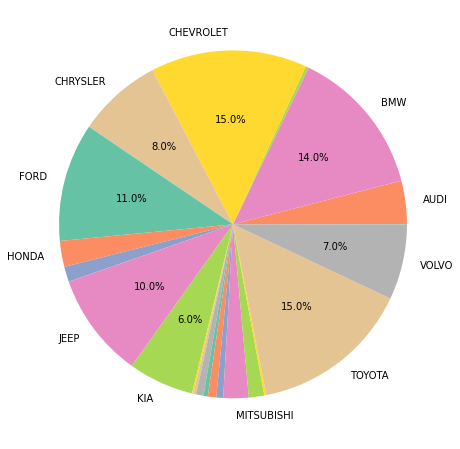

In [39]:
plt.figure(figsize=(8,8))
plt.pie(m['count'], labels=m['Make'], colors=sns.color_palette('Set2'), autopct=lambda p: '{:.1f}%'.format(round(p)) if p >= 5 else '');

In [16]:
dfsubset=df[df['Make'].isin(['CHEVROLET','TESLA','NISSAN'])]

In [17]:
m=np.unique(dfsubset[dfsubset['Electric Vehicle Type']=='Battery Electric Vehicle (BEV)']['Make'],return_counts=True)

In [18]:
m[1]

array([ 7128, 13481, 68821], dtype=int64)

In [19]:
q=np.unique(dfsubset['Model'],return_counts=True)

In [20]:
d={'LEAF':'30k','MODEL Y':'40k','MODEL 3':'40k','ARIYA':'50k','MODEL X':'75k','VOLT':'20k','S-10 PICKUP':'20k','BOLT EUV':'20k','SPARK':'25k','ROADSTER':'200k'}

In [21]:
# dfsubset.groupby(['Make','Model']).size()
df_agg=pd.DataFrame({'Quantity_Sold' : dfsubset.groupby(['Make','Model']).size()}).reset_index()

In [22]:
df_agg['Average_MSRP']=df_agg['Model'].map(d)

In [23]:
df_agg['Model MSRP']=df_agg['Model']+' ' +df_agg['Average_MSRP']

<AxesSubplot:xlabel='Make', ylabel='Quantity_Sold'>

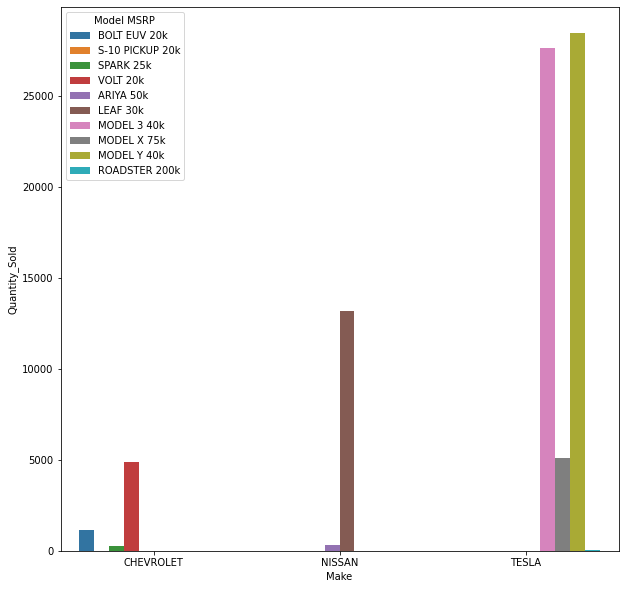

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_agg,x='Make',y='Quantity_Sold',hue='Model MSRP')

In [25]:
total_sold=pd.DataFrame({'Make':df.groupby(['Postal Code']).count()['Make']}).reset_index()
tesla_sold=pd.DataFrame({'Make':dfsubset[dfsubset['Make']=='TESLA'].groupby(['Postal Code']).count()['Make']}).reset_index()
nissan_sold=pd.DataFrame({'Make':dfsubset[dfsubset['Make']=='NISSAN'].groupby(['Postal Code']).count()['Make']}).reset_index()
chev_sold=pd.DataFrame({'Make':dfsubset[dfsubset['Make']=='CHEVROLET'].groupby(['Postal Code']).count()['Make']}).reset_index()

In [26]:
sold_cars=pd.merge(pd.merge(total_sold,tesla_sold,on='Postal Code',how='left'),pd.merge(nissan_sold,chev_sold,on='Postal Code',how='left'),on='Postal Code',how='left')
sold_cars=sold_cars.rename(columns={'Make_x_x':'total_sold','Make_y_x':'tesla_sold','Make_x_y':'nissan_sold','Make_y_y':'chev_sold'})
sold_cars.sort_values('tesla_sold',ascending=False)


,Postal Code,total_sold,tesla_sold,nissan_sold,chev_sold
38,98052.0,3869,2390.0,338.0,148.0
10,98012.0,2753,1750.0,201.0,93.0
3,98004.0,2456,1661.0,63.0,52.0
5,98006.0,2457,1606.0,151.0,62.0
25,98033.0,2619,1527.0,131.0,104.0
...,...,...,...,...,...
520,99341.0,2,NaN,NaN,NaN
523,99346.0,1,NaN,NaN,NaN
524,99347.0,3,NaN,NaN,NaN
530,99356.0,1,NaN,NaN,NaN


<AxesSubplot:>

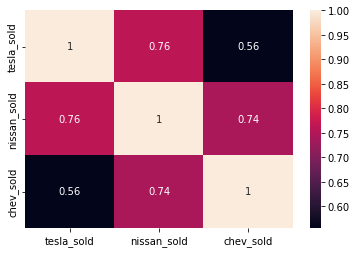

In [27]:
sns.heatmap(sold_cars.drop(columns=['Postal Code','total_sold']).corr(),annot=True)

In [28]:
q=pd.concat([sold_cars[['Postal Code','tesla_sold','chev_sold','total_sold']],sold_cars['tesla_sold']/sold_cars['total_sold']],axis=1).rename(columns={0:'tesla_perc'})
q[q['total_sold']>500].sort_values('tesla_perc',ascending=False).head(10)

,Postal Code,tesla_sold,chev_sold,total_sold,tesla_perc
70,98121.0,507.0,15.0,708,0.716102
3,98004.0,1661.0,52.0,2456,0.676303
54,98101.0,369.0,11.0,555,0.664865
21,98029.0,1053.0,63.0,1592,0.661432
50,98075.0,1178.0,38.0,1785,0.659944
52,98087.0,556.0,40.0,846,0.657210
5,98006.0,1606.0,62.0,2457,0.653643
49,98074.0,1395.0,67.0,2141,0.651565
10,98012.0,1750.0,93.0,2753,0.635670
62,98109.0,833.0,42.0,1331,0.625845


In [29]:
q=pd.concat([sold_cars[['Postal Code','chev_sold','total_sold']],sold_cars['chev_sold']/sold_cars['total_sold']],axis=1).rename(columns={0:'chev_perc'})
q[q['total_sold']>500].sort_values('chev_perc',ascending=False).head(10)

,Postal Code,chev_sold,total_sold,chev_perc
248,98501.0,429.0,1640,0.261585
57,98104.0,138.0,689,0.200290
201,98368.0,92.0,559,0.164580
80,98148.0,164.0,1022,0.160470
212,98382.0,82.0,540,0.151852
250,98503.0,65.0,503,0.129225
228,98407.0,64.0,530,0.120755
79,98146.0,63.0,524,0.120229
59,98106.0,74.0,623,0.118780
249,98502.0,92.0,790,0.116456


In [30]:
sold_cars[(sold_cars['tesla_sold']/sold_cars['total_sold']>=0.46) & (sold_cars['chev_sold']/sold_cars['total_sold']>=0.08)].shape

(28, 5)

In [31]:
sold_cars[(sold_cars['chev_sold']/sold_cars['total_sold']<0.08) & (sold_cars['tesla_sold']/sold_cars['total_sold']>=0.46)].shape

(66, 5)

In [32]:
sold_cars[(sold_cars['chev_sold']/sold_cars['total_sold']>=0.08) & (sold_cars['tesla_sold']/sold_cars['total_sold']<0.46)].shape

(223, 5)

In [33]:
sold_cars[(sold_cars['chev_sold']/sold_cars['total_sold']<0.08) & (sold_cars['tesla_sold']/sold_cars['total_sold']<0.46)].shape

(44, 5)

In [34]:
g=['Tesla up','Tesla down']
m=[[28,66],[223,44]]
pd.DataFrame(m,columns=['Chevrolet up','Chevrolet down'],index=g)

,Chevrolet up,Chevrolet down
Tesla up,28,66
Tesla down,223,44


In [ ]:
len(total_sold)

Summary

Since the new Chevy model is comparable to the Tesla in price and features, I would recommend that Chevy focus their marketing campaign on the 94 zipcodes where Tesla is selling above their average. This is because the population in those zipcodes are able to afford and preferring the Tesla over other makes. For testing purposes they can target a few zipcodes in the 267 zipcodes where Tesla is selling below their average. 